In [1]:
library(ggplot2)

<html><b>Reading in the data</b></html>

In [2]:
data <-read.csv("Wholesale customers data.csv",header=T)
summary(data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

<html><b>Removing the top 5 customers from each category</b></html>

In [3]:
top.n.custs <- function (data,cols,n=5) { #Requires some data frame and the top N to remove
idx.to.remove <-integer(0) #Initialize a vector to hold customers being removed
for (c in cols){ # For every column in the data we passed to this function
col.order <-order(data[,c],decreasing=T) #Sort column "c" in descending order (bigger on top)
#Order returns the sorted index (e.g. row 15, 3, 7, 1, ...) rather than the actual values sorted.
idx <-head(col.order, n) #Take the first n of the sorted column C to
idx.to.remove <-union(idx.to.remove,idx) #Combine and de-duplicate the row ids that need to be removed
}
return(idx.to.remove) #Return the indexes of customers to be removed
}

In [4]:
top.custs <-top.n.custs(data,cols=3:8,n=5)
top.custs

[1] 182 126 285  40 259  87  48  86 184  62 334  66 326  94 197 104  24  72  88

In [5]:
length(top.custs) #How Many Customers to be Removed?
data[top.custs,] #Examine the customers

[1] 19

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943
62,2,3,35942,38369,59598,3254,26701,2017


In [6]:
data.rm.top <-data[-c(top.custs),] #Remove the Customers

In [7]:
data.rm.top <-data.rm.top[,-c(1,2)] 

In [8]:
data.rm.top

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,12669,9656,7561,214,2674,1338
2,7057,9810,9568,1762,3293,1776
3,6353,8808,7684,2405,3516,7844
4,13265,1196,4221,6404,507,1788
5,22615,5410,7198,3915,1777,5185
6,9413,8259,5126,666,1795,1451
7,12126,3199,6975,480,3140,545
8,7579,4956,9426,1669,3321,2566
9,5963,3648,6192,425,1716,750
10,6006,11093,18881,1159,7425,2098


<html><b>Performing the cluster analysis</b></html>

In [9]:
set.seed(76964057) #Set the seed for reproducibility

In [12]:
k <-kmeans(data.rm.top, centers=5, algorithm=c("Hartigan-Wong")) #Create 5 clusters, Remove columns 1 and 2

In [13]:
nrow(data)

[1] 440

In [49]:
k

K-means clustering with 5 clusters of sizes 83, 108, 43, 42, 145

Cluster means:
      Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1  4189.747  7645.639 11015.277 1335.145        4750.4819  1387.1205
2 16470.870  3026.491  4264.741 3217.306         996.5556  1319.7593
3 33120.163  4896.977  5579.860 3823.372         945.4651  1620.1860
4  5830.214 15295.048 23449.167 1936.452       10361.6429  1912.7381
5  5043.434  2329.683  2786.138 2689.814         652.8276   849.8414

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1   1   2   2   5   2   1   5   4   1   2   3   2   3   5   1   5   2   1 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  41  42 
  2   5   3   2   2   5   2   4   3   2   5   2   3   5   1   3   1   4   2   2 
 43  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59  60  61  63  64 
  1   4   1   4   4   1   4   5   5   3   1   3   5   4   1   2   1   1   1   1 

In [50]:
k$centers #Display cluster centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,4189.747,7645.639,11015.277,1335.145,4750.4819,1387.1205
2,16470.870,3026.491,4264.741,3217.306,996.5556,1319.7593
3,33120.163,4896.977,5579.860,3823.372,945.4651,1620.1860
4,5830.214,15295.048,23449.167,1936.452,10361.6429,1912.7381
5,5043.434,2329.683,2786.138,2689.814,652.8276,849.8414


In [51]:
table(k$cluster) #Give a count of data points in each cluster


  1   2   3   4   5 
 83 108  43  42 145 

<html><b>Trying other valuesof k</b></html>

In [52]:
rng<-2:20 #K from 2 to 20
tries<-100 #Run the K Means algorithm 100 times
avg.totw.ss<-integer(length(rng)) #Set up an empty vector to hold all of points

In [53]:
for(v in rng){ # For each value of the range variable
v.totw.ss<-integer(tries) #Set up an empty vector to hold the 100 tries
for(i in 1:tries){
k.temp<-kmeans(data.rm.top,centers=v) #Run kmeans
v.totw.ss[i]<-k.temp$tot.withinss#Store the total withinss
}
avg.totw.ss[v-1]<-mean(v.totw.ss) #Average the 100 total withinss
}

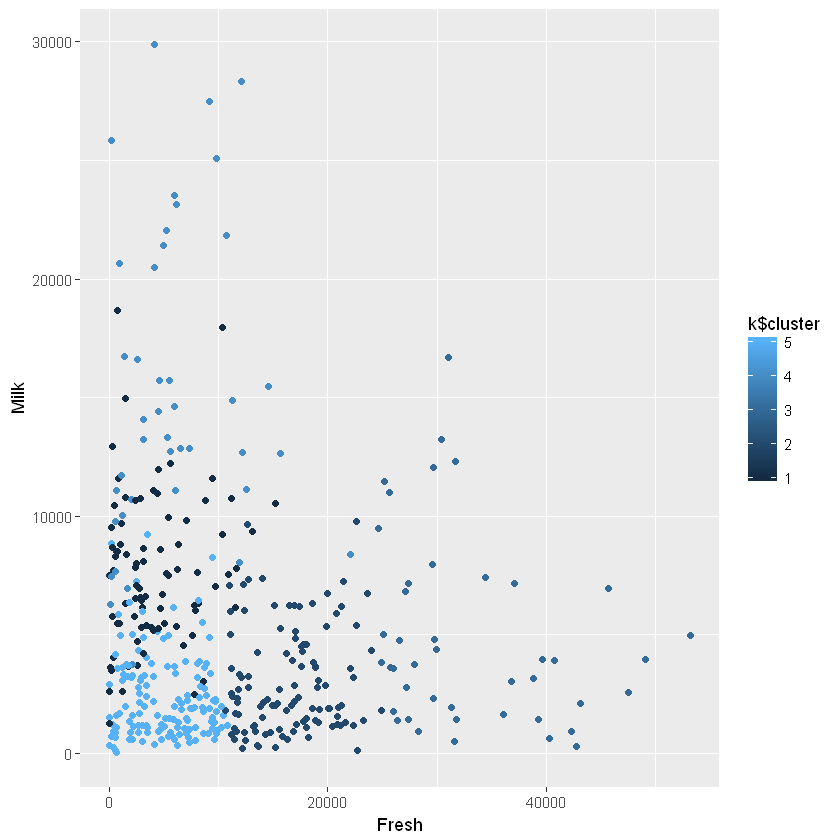

In [59]:
ggplot(data.rm.top, aes(Fresh, Milk, color = k$cluster)) + geom_point()

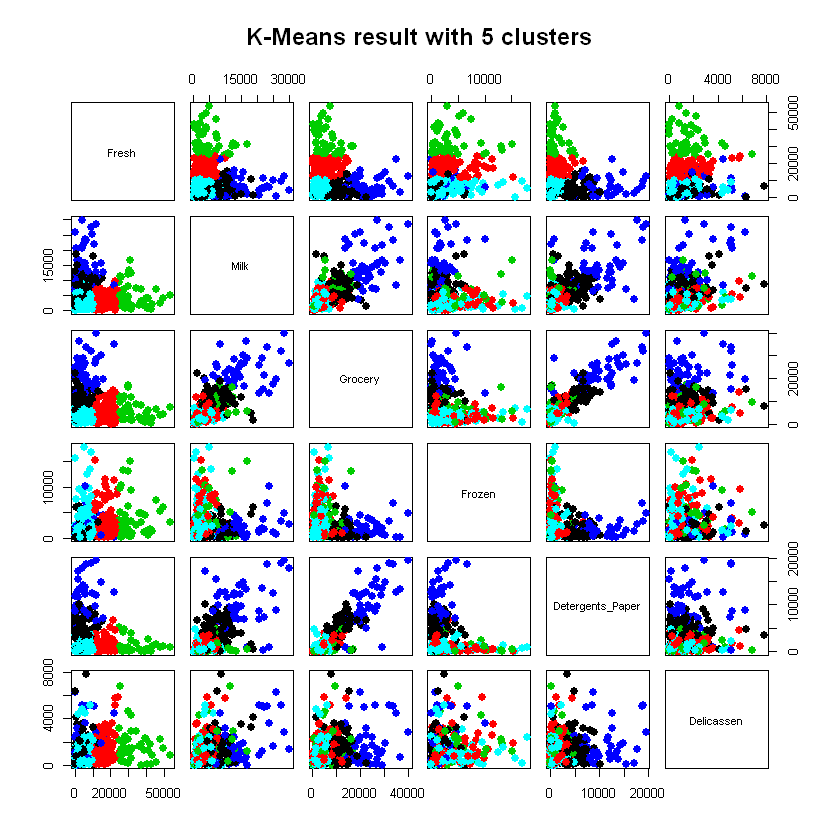

In [54]:
plot(data.rm.top, col =(k$cluster) , main="K-Means result with 5 clusters", pch=20, cex=2)